In [1]:
import torch
import torch.nn as nn
import numpy as np

from torch.utils.data import Dataset

import pandas, random, numpy
import matplotlib.pyplot as plt

from PIL import Image

In [2]:

class View(nn.Module):
    def __init__(self, shape):
        super().__init__()
        self.shape = shape,
        
    def forward(self, x):
        return x.view(*self.shape)


In [3]:

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        self.data_df = self.data_df.drop(labels=[0], axis=0)
        self.labels          = []
        self.tensor_imgs     = []
        self.one_hot_classes = []
        
        self.n_samples = len(self.data_df)
        
    def convert_data_to_tensors(self):
        for index in range(self.n_samples):
            label = self.data_df.iloc[index, 0]
            target = torch.zeros((10))
            target[  int(label)  ] = 1.0
            
            image_values = torch.FloatTensor( self.data_df.iloc[index, 1:].values.astype(float)  ) / 255.0
            
            self.labels.append(            label          )
            self.tensor_imgs.append(       image_values   )
            self.one_hot_classes.append(   target         )
            
    
    def plot_image(self, index):
        img = self.data_df.iloc[index, 1:].values.reshape(28, 28)
        print(img.shape)
        label = str(  self.data_df.iloc[index, 0]  )
        img = img.astype(float)
        
        return img, label


In [4]:

mnist_dataset_train = MnistDataset('data/mnist_train.csv')


/var/folders/yw/8h855lk57575rr7jsfhz8vpw0000gn/T/ipykernel_30929/2659856531.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [5]:

my_img, label = mnist_dataset_train.plot_image(117)


(28, 28)


In [6]:

mnist_dataset_train.data_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59996,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/py

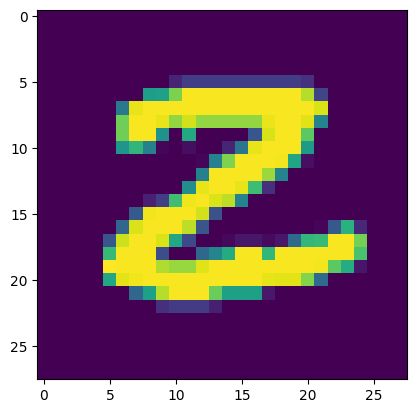

2


In [7]:

plt.imshow(my_img)
plt.show()
print(label)


In [8]:

mnist_dataset_train.convert_data_to_tensors()


In [39]:

class Classifier_CNN(nn.Module):
    
    def __init__(self):
        
        super().__init__()
        
        ## define the CNN architecture

        self.model = nn.Sequential(
              ## 1ST CNN layer
              nn.Conv2d( 1, 10, kernel_size=5, stride=2),
              nn.LeakyReLU(0.2),
              nn.BatchNorm2d(10),
              ## second CNN layer
              nn.Conv2d(10, 10, kernel_size=3, stride=2),
              nn.LeakyReLU(0.2),
              nn.BatchNorm2d(10),
              ## simple feed forward layer
              View(250),    ##
              nn.Linear(250 , 10),
              nn.Sigmoid()
        )
        
        ## Create loss function
        self.loss_function = nn.BCELoss()
        
        self.optimizer = torch.optim.Adam(self.parameters())
        
        ## counter and accumulator for progress
        self.counter = 0 
        self.progress = []
    
    def forward(self, inputs):
        return self.model(   inputs   )
    
    
    def train(self, inputs, targets):

        outputs = self.forward(inputs)
        
        loss = self.loss_function(outputs, targets)
        
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(  loss.item()  )
        if (self.counter % 10000 == 0):
            print("counter= ", self.counter)
        
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
    def plot_progress(self):
        df = pandas.DataFrame( self.progress, columns=['loss'] )
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', yticks=(0, 0.25, 0.5))
        

In [40]:

%%time

CNN = Classifier_CNN()

epochs = 3

for i in range(epochs):
    
    print('training epoch', i+1, "of", epochs)
    for i in range(mnist_dataset_train.n_samples):
        label             = mnist_dataset_train.labels[i]
        image_data_tensor = mnist_dataset_train.tensor_imgs[i]
        target_tensor     = mnist_dataset_train.one_hot_classes[i]
        
        CNN.train(image_data_tensor.view(1, 1, 28, 28), target_tensor)


training epoch 1 of 3
counter=  10000
counter=  20000
counter=  30000
counter=  40000
counter=  50000
counter=  60000
training epoch 2 of 3
counter=  70000
counter=  80000
counter=  90000
counter=  100000
counter=  110000
counter=  120000
training epoch 3 of 3
counter=  130000
counter=  140000
counter=  150000
counter=  160000
counter=  170000
counter=  180000
CPU times: user 1min 18s, sys: 1min 21s, total: 2min 40s
Wall time: 1min 39s


/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/py

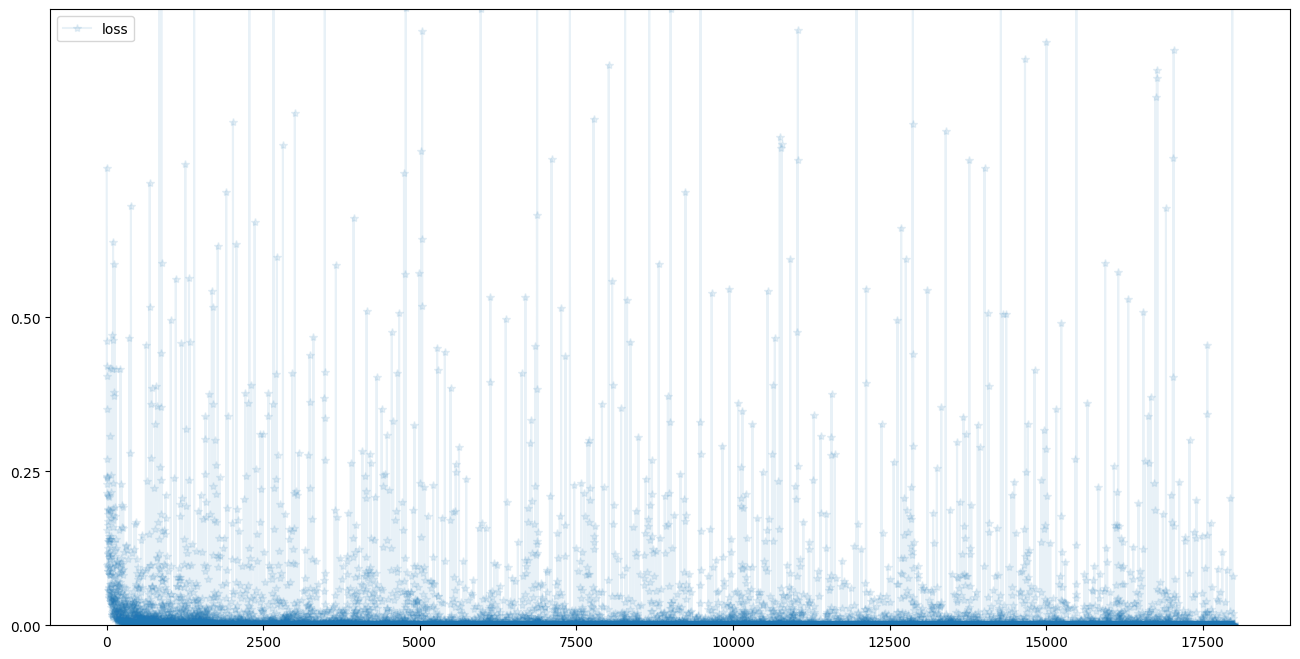

In [41]:

CNN.plot_progress()


In [12]:

mnist_test_dataset = MnistDataset('data/mnist_test.csv')


/var/folders/yw/8h855lk57575rr7jsfhz8vpw0000gn/T/ipykernel_30929/2659856531.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [13]:

mnist_test_dataset.convert_data_to_tensors()


In [14]:

record = 130


In [15]:

my_img, label = mnist_test_dataset.plot_image(record)


(28, 28)


/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/abhisheksingh/anaconda3/envs/mlpy/lib/py

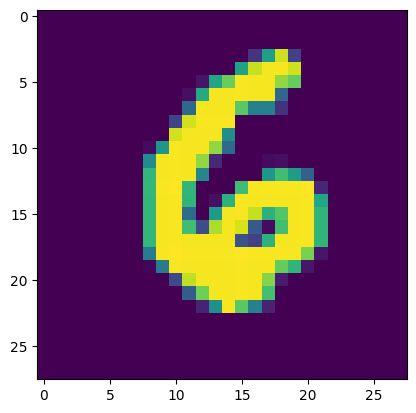

6


In [16]:

plt.imshow(my_img)
plt.show()
print(label)


In [17]:

image_data = mnist_test_dataset.tensor_imgs[record]


In [18]:

output = CNN.forward(image_data.view(1, 1, 28, 28))


In [19]:
output

tensor([1.2111e-05, 4.9001e-08, 2.5034e-08, 1.2460e-08, 2.9535e-06, 5.5511e-03,
        9.9995e-01, 3.6744e-09, 2.1699e-06, 1.3936e-05],
       grad_fn=<SigmoidBackward0>)

In [20]:
val, index = torch.max(output, dim=0)

In [21]:
index

tensor(6)


## Figuring out the convolution maths for your model 


In [22]:

my_tensor_test = torch.randn(1, 1, 28,  28)
my_tensor_test.shape


torch.Size([1, 1, 28, 28])

In [23]:

mm_conv_transpose_test = nn.Conv2d( 1, 10, kernel_size=5, stride=2)


In [24]:

mm_res_test = mm_conv_transpose_test(my_tensor_test)


In [25]:

mm_res_test.shape


torch.Size([1, 10, 12, 12])

In [26]:


ll_conv_transp_test = nn.Conv2d( 10, 10, kernel_size=3, stride=2)


In [27]:

ll_res_test = ll_conv_transp_test(mm_res_test)
ll_res_test.shape


torch.Size([1, 10, 5, 5])

In [28]:

## ss_conv_transp_test = nn.ConvTranspose2d(256, 3, kernel_size=8, stride=2, padding=1)


In [29]:

## ss_res_test = ss_conv_transp_test(ll_res_test)

## ss_res_test.shape


In [30]:

vv_view = View( (1, -1) )


In [31]:

vv_res = vv_view( ll_res_test  )


In [32]:

vv_res.shape


torch.Size([1, 250])